<a href="https://colab.research.google.com/github/KrisameReimu/Android_phonebook/blob/main/EIE4121LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
'chlorides', 'free sulfur dioxide', 'total sulfur', 'density', 'ph', 'suplates', 'alcohol',
'quality']
dataset = pandas.read_csv('winequality-s.csv', names=names)

In [ ]:

print(dataset.shape)

(2517, 12)


In [ ]:

print("Dataset head:")
print(dataset.head(5))


print("\nDataset tail:")
print(dataset.tail(5))

print("\nDataset description:")
print(dataset.describe())

Dataset head:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.1              0.27         0.41            1.45      0.033   
1            8.6              0.23         0.40            4.20      0.035   
2            7.9              0.18         0.37            1.20      0.040   
3            8.3              0.42         0.62           19.25      0.040   
4            6.5              0.31         0.14            7.50      0.044   

   free sulfur dioxide  total sulfur  density    ph  suplates  alcohol  \
0                 11.0          63.0   0.9908  2.99      0.56     12.0   
1                 17.0         109.0   0.9947  3.14      0.53      9.7   
2                 16.0          75.0   0.9920  3.18      0.63     10.8   
3                 41.0         172.0   1.0002  2.98      0.67      9.7   
4                 34.0         133.0   0.9955  3.22      0.50      9.5   

   quality  
0        0  
1        0  
2        0  
3        0  
4      

In [ ]:
print(dataset.quality.value_counts())

quality
0    1457
1    1060
Name: count, dtype: int64


In [ ]:
import numpy as np

np.random.seed(0)

perm = np.random.permutation(2517)
x = dataset.iloc[:,0:11].values
y = dataset.iloc[:,11].values


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

In [ ]:
@interact_manual( feature=IntSlider(min=0, max=10, step=1),
label=IntSlider(min=0,max=1,step=1))
def density_plot(feature, label):
 plt.hist(x[y==label,feature], density=True)
 #
 mu = np.mean(x[y==label,feature]) # mean
 var = np.var(x[y==label,feature]) # variance
 std = np.sqrt(var) # standard deviation
 #
 x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
 plt.plot(x_axis, norm.pdf(x_axis,mu,std), 'r', lw=2)
 plt.title("Quality "+str(label) )
 plt.xlabel(names[feature], fontsize=14, color='red')
 plt.ylabel('Density', fontsize=14, color='red')
 plt.show()


interactive(children=(IntSlider(value=0, description='feature', max=10), IntSlider(value=0, description='label…

In [ ]:
def fit_generative_model(x, y, feature):
    k = 2  # number of classes
    mu = np.zeros(k)  # list of means
    var = np.zeros(k)  # list of variances
    pi = np.zeros(k)  # list of class weights
    for label in [0, 1]:
        indices = (y == label)
        mu[label] = np.mean(x[indices, feature])
        var[label] = np.var(x[indices, feature])
        pi[label] = float(sum(indices)) / float(len(y))
    return mu, var, pi

@interact_manual(feature=IntSlider(0, 0, 10))
def show_densities(feature):
    mu, var, pi = fit_generative_model(x, y, feature)
    colors = ['r', 'g']
    for classIndex in [0, 1]:
        m = mu[classIndex]
        s = np.sqrt(var[classIndex])
        x_axis = np.linspace(m - 3*s, m + 3*s, 1000)
        plt.plot(x_axis, norm.pdf(x_axis, m, s), colors[classIndex], label="class " + str(classIndex))
    plt.xlabel(names[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=0, description='feature', max=10), Button(description='Run Interact', st…

Feature: fixed acidity


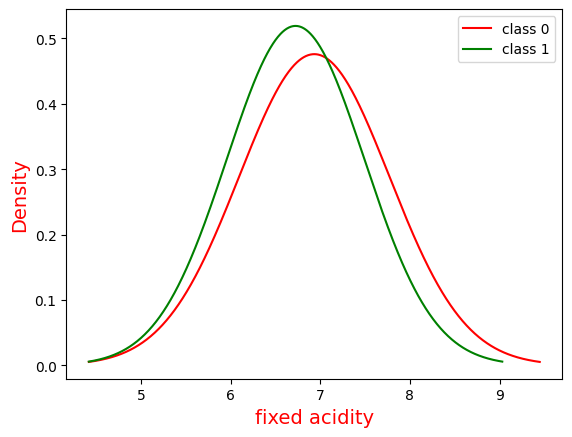

Feature: volatile acidity


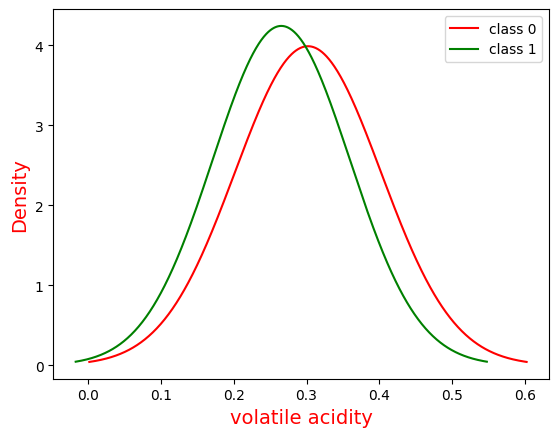

Feature: citric acid


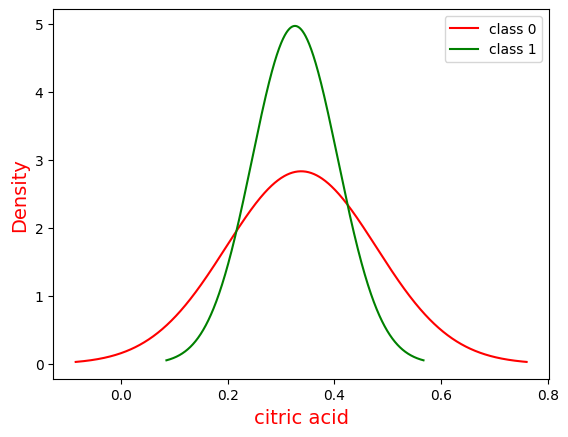

Feature: residual sugar


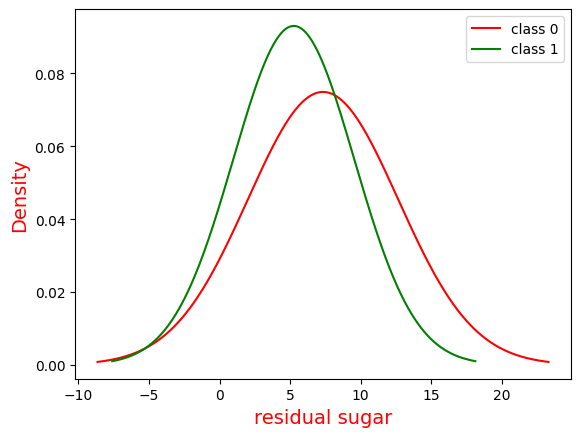

Feature: chlorides


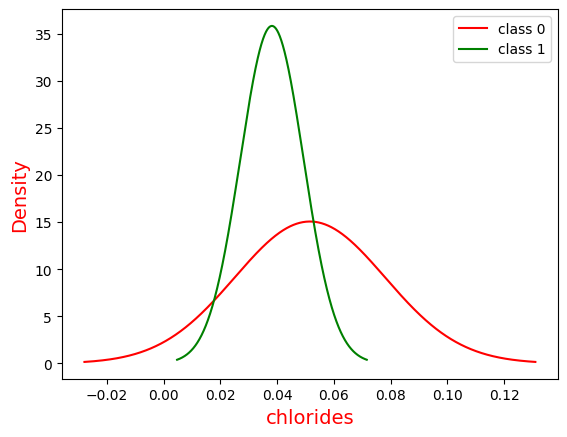

Feature: free sulfur dioxide


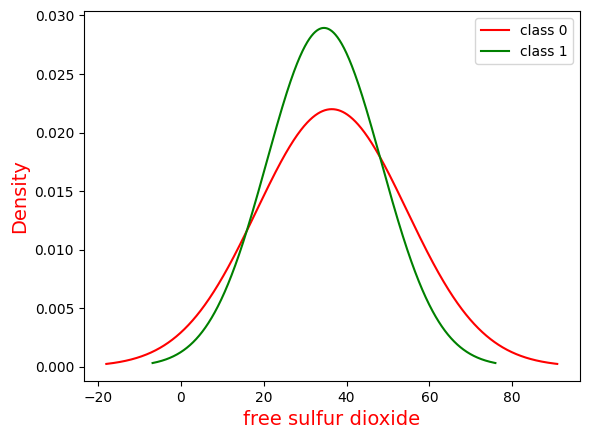

Feature: total sulfur


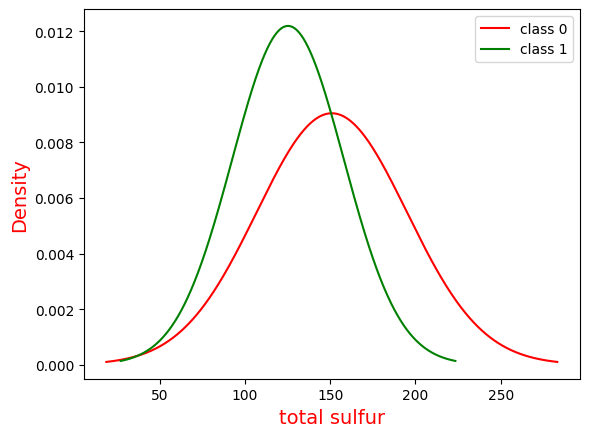

Feature: density


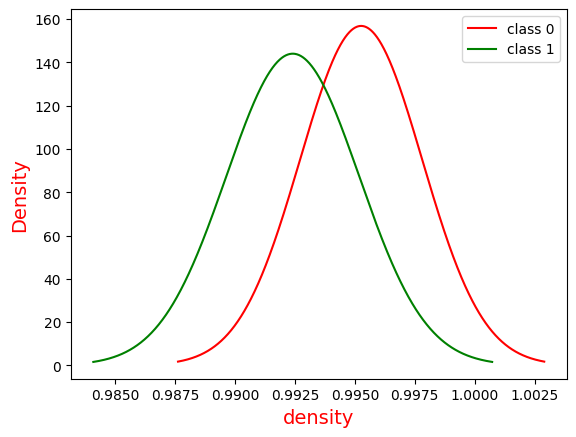

Feature: ph


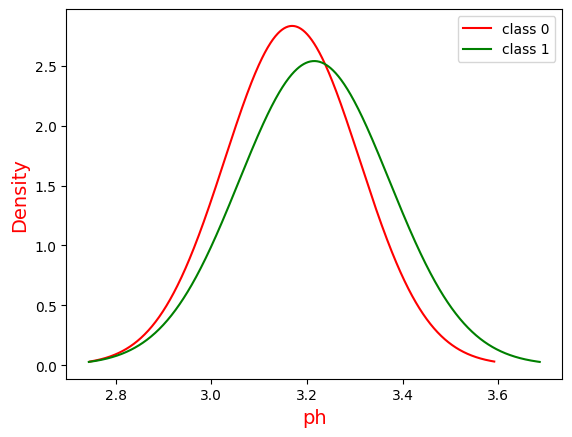

Feature: suplates


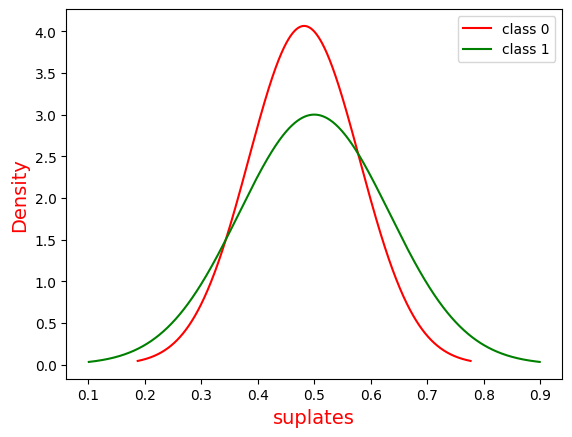

Feature: alcohol


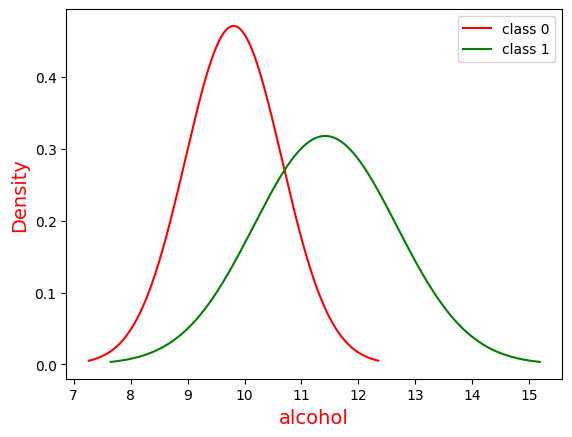

In [ ]:
def fit_generative_model(x, y, feature):
    k = 2  # 类别数
    mu = np.zeros(k)  # 均值列表
    var = np.zeros(k)  # 方差列表
    pi = np.zeros(k)  # 类别权重列表
    for label in [0, 1]:
        indices = (y==label)
        mu[label] = np.mean(x[indices, feature])
        var[label] = np.var(x[indices, feature])
        pi[label] = float(sum(indices))/float(len(y))
    return mu, var, pi

def show_densities(feature):
    mu, var, pi = fit_generative_model(x, y, feature)
    colors = ['r', 'g']
    for classIndex in [0, 1]:
        m = mu[classIndex]
        s = np.sqrt(var[classIndex])
        x_axis = np.linspace(m - 3*s, m+3*s, 1000)
        plt.plot(x_axis, norm.pdf(x_axis, m, s), colors[classIndex], label="class " + str(classIndex))
    plt.xlabel(names[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.legend()
    plt.show()

# 查看每个特征的分布
for i in range(11):
    print(f"Feature: {names[i]}")
    show_densities(i)


In [ ]:
from sklearn.model_selection import train_test_split
val_size = 0.2
seed=7
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size=val_size, random_state=seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrains = sc_x.fit_transform(xtrain)
xvals = sc_x.transform(xval)


1: 0.785402 (0.021625)
3: 0.762059 (0.015312)
5: 0.752622 (0.016836)


<ipython-input-13-aa5fea55f468>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultskNN, labels=nameskNN)


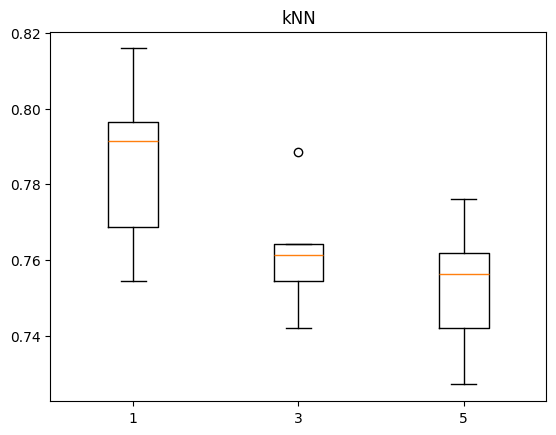

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
modelskNN=[]
modelskNN.append(('1', KNeighborsClassifier(n_neighbors=1)))
modelskNN.append(('3', KNeighborsClassifier(n_neighbors=3)))
modelskNN.append(('5', KNeighborsClassifier(n_neighbors=5)))

resultskNN = []
nameskNN=[]
kfold = StratifiedKFold(n_splits=5)
for name, model in modelskNN:
  cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
  resultskNN.append(cv_results)
  nameskNN.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(resultskNN, labels=nameskNN)
plt.title('kNN')
plt.show()


1: 0.875802 (0.008383)
3: 0.859908 (0.012053)
5: 0.853450 (0.017093)


<ipython-input-14-977944dfa800>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultskNN, labels=nameskNN)


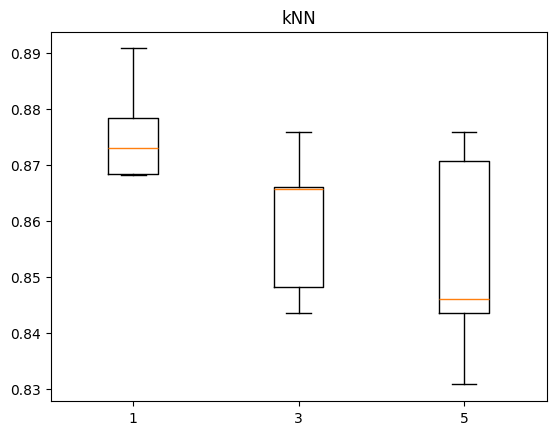

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
modelskNN=[]
modelskNN.append(('1', KNeighborsClassifier(n_neighbors=1)))
modelskNN.append(('3', KNeighborsClassifier(n_neighbors=3)))
modelskNN.append(('5', KNeighborsClassifier(n_neighbors=5)))

resultskNN = []
nameskNN=[]
kfold = StratifiedKFold(n_splits=5)
for name, model in modelskNN:
  cv_results = cross_val_score(model, xtrains, ytrain, cv=kfold, scoring='accuracy')
  resultskNN.append(cv_results)
  nameskNN.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(resultskNN, labels=nameskNN)
plt.title('kNN')
plt.show()


KNN - Original Features:
k=1: Mean Accuracy = 0.7854, Std = 0.0216
k=3: Mean Accuracy = 0.7621, Std = 0.0153
k=5: Mean Accuracy = 0.7526, Std = 0.0168
k=7: Mean Accuracy = 0.7506, Std = 0.0135
k=9: Mean Accuracy = 0.7427, Std = 0.0172

KNN - Normalized Features:
k=1: Mean Accuracy = 0.8758, Std = 0.0084
k=3: Mean Accuracy = 0.8599, Std = 0.0121
k=5: Mean Accuracy = 0.8534, Std = 0.0171
k=7: Mean Accuracy = 0.8470, Std = 0.0123
k=9: Mean Accuracy = 0.8445, Std = 0.0103


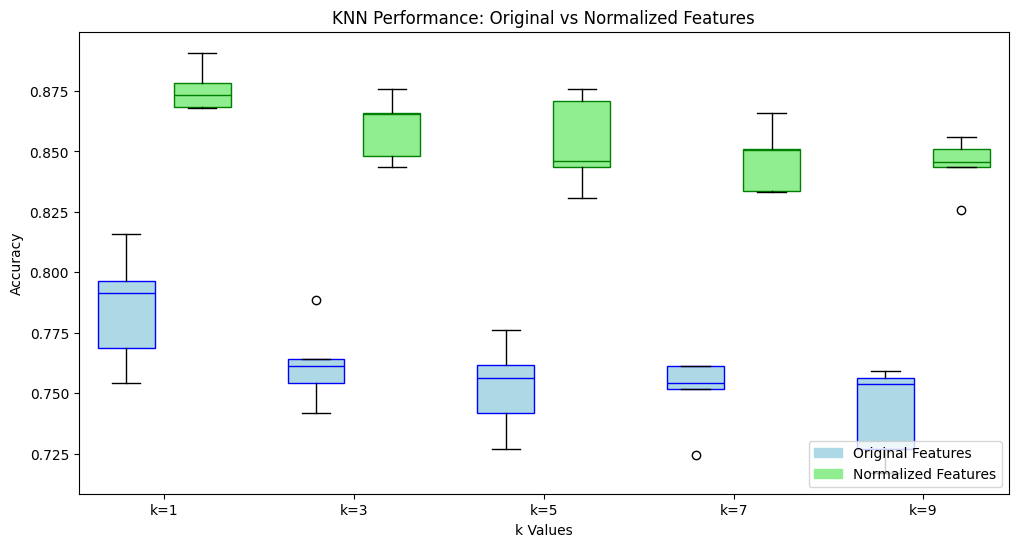


Validation Results - Original Features:
Accuracy: 0.7857
Confusion Matrix:
[[230  55]
 [ 53 166]]

Validation Results - Normalized Features:
Accuracy: 0.8790
Confusion Matrix:
[[249  36]
 [ 25 194]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches  # 用于自定义图例的颜色块
# 定义 KNN 模型的不同超参数 k 值
modelskNN = []
for k in [1, 3, 5, 7, 9]:
    modelskNN.append((f'k={k}', KNeighborsClassifier(n_neighbors=k)))

# 初始化交叉验证
kfold = StratifiedKFold(n_splits=5)

# 存储结果
results_original = []
results_normalized = []
names = []

# 对原始特征进行交叉验证
print("KNN - Original Features:")
for name, model in modelskNN:
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    results_original.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')

# 对归一化特征进行交叉验证
print("\nKNN - Normalized Features:")
for name, model in modelskNN:
    cv_results = cross_val_score(model, xtrains, ytrain, cv=kfold, scoring='accuracy')
    results_normalized.append(cv_results)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')

# 可视化结果对比

# 设置箱线图的位置
positions_original = np.arange(len(names)) * 2  # 原始特征的位置
positions_normalized = positions_original + 0.8  # 归一化特征的位置

# 绘制箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(results_original, positions=positions_original, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='blue'))
plt.boxplot(results_normalized, positions=positions_normalized, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='green'))

# 定义图例的颜色块
original_patch = mpatches.Patch(color='lightblue', label='Original Features')
normalized_patch = mpatches.Patch(color='lightgreen', label='Normalized Features')

# 设置图例
plt.legend(handles=[original_patch, normalized_patch], loc='lower right')

# 设置 x 轴标签和标题
plt.xticks(positions_original + 0.4, names)
plt.title('KNN Performance: Original vs Normalized Features')
plt.xlabel('k Values')
plt.ylabel('Accuracy')

# 显示图像
plt.show()
plt.show()

# 在验证集上测试最佳 k 值
best_k = 1  # 根据交叉验证结果选择最佳 k 值
kNN_original = KNeighborsClassifier(n_neighbors=best_k)
kNN_original.fit(xtrain, ytrain)
predictions_original = kNN_original.predict(xval)

kNN_normalized = KNeighborsClassifier(n_neighbors=best_k)
kNN_normalized.fit(xtrains, ytrain)
predictions_normalized = kNN_normalized.predict(xvals)

# 打印验证集上的结果
print("\nValidation Results - Original Features:")
print(f"Accuracy: {metrics.accuracy_score(yval, predictions_original):.4f}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(yval, predictions_original)}")

print("\nValidation Results - Normalized Features:")
print(f"Accuracy: {metrics.accuracy_score(yval, predictions_normalized):.4f}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(yval, predictions_normalized)}")


KNN - Original Features:
k=1: Mean Accuracy = 0.7854, Std = 0.0216
k=3: Mean Accuracy = 0.7621, Std = 0.0153
k=5: Mean Accuracy = 0.7526, Std = 0.0168
k=7: Mean Accuracy = 0.7506, Std = 0.0135
k=9: Mean Accuracy = 0.7427, Std = 0.0172

KNN - Normalized Features:
k=1: Mean Accuracy = 0.8758, Std = 0.0084
k=3: Mean Accuracy = 0.8599, Std = 0.0121
k=5: Mean Accuracy = 0.8534, Std = 0.0171
k=7: Mean Accuracy = 0.8470, Std = 0.0123
k=9: Mean Accuracy = 0.8445, Std = 0.0103


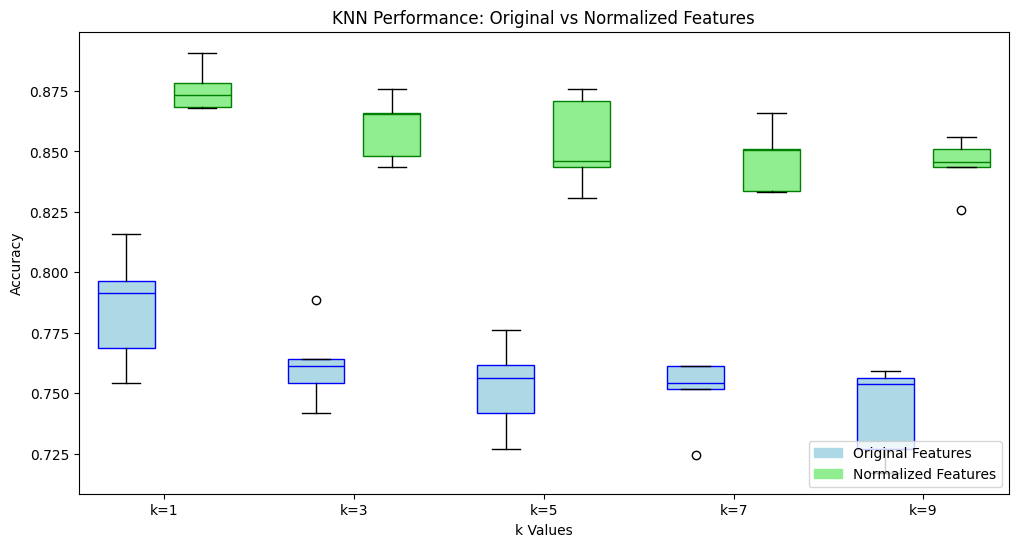


Comparison of Mean and Std (Original vs Normalized Features):
k Value		Original (Mean ± Std)		Normalized (Mean ± Std)
k=1		0.7854 ± 0.0216		0.8758 ± 0.0084
k=3		0.7621 ± 0.0153		0.8599 ± 0.0121
k=5		0.7526 ± 0.0168		0.8534 ± 0.0171
k=7		0.7506 ± 0.0135		0.8470 ± 0.0123
k=9		0.7427 ± 0.0172		0.8445 ± 0.0103

Validation Results - Original Features:
Accuracy: 0.7857
Confusion Matrix:
[[230  55]
 [ 53 166]]

Validation Results - Normalized Features:
Accuracy: 0.8790
Confusion Matrix:
[[249  36]
 [ 25 194]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches  # 用于自定义图例的颜色块

# 定义 KNN 模型的不同超参数 k 值
modelskNN = []
for k in [1, 3, 5, 7, 9]:
    modelskNN.append((f'k={k}', KNeighborsClassifier(n_neighbors=k)))

# 初始化交叉验证
kfold = StratifiedKFold(n_splits=5)

# 存储结果
results_original = []
results_normalized = []
names = []
mean_std_original = []  # 存储原始特征的 mean 和 std
mean_std_normalized = []  # 存储归一化特征的 mean 和 std

# 对原始特征进行交叉验证
print("KNN - Original Features:")
for name, model in modelskNN:
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    results_original.append(cv_results)
    names.append(name)
    mean_std_original.append((cv_results.mean(), cv_results.std()))  # 保存 mean 和 std
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')

# 对归一化特征进行交叉验证
print("\nKNN - Normalized Features:")
for name, model in modelskNN:
    cv_results = cross_val_score(model, xtrains, ytrain, cv=kfold, scoring='accuracy')
    results_normalized.append(cv_results)
    mean_std_normalized.append((cv_results.mean(), cv_results.std()))  # 保存 mean 和 std
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')

# 可视化结果对比

# 设置箱线图的位置
positions_original = np.arange(len(names)) * 2  # 原始特征的位置
positions_normalized = positions_original + 0.8  # 归一化特征的位置

# 绘制箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(results_original, positions=positions_original, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='blue'))
plt.boxplot(results_normalized, positions=positions_normalized, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='green'))

# 定义图例的颜色块
original_patch = mpatches.Patch(color='lightblue', label='Original Features')
normalized_patch = mpatches.Patch(color='lightgreen', label='Normalized Features')

# 设置图例
plt.legend(handles=[original_patch, normalized_patch], loc='lower right')

# 设置 x 轴标签和标题
plt.xticks(positions_original + 0.4, names)
plt.title('KNN Performance: Original vs Normalized Features')
plt.xlabel('k Values')
plt.ylabel('Accuracy')

# 显示图像
plt.show()

# 打印交叉验证的 mean 和 std 对比表
print("\nComparison of Mean and Std (Original vs Normalized Features):")
print("k Value\t\tOriginal (Mean ± Std)\t\tNormalized (Mean ± Std)")
for i, name in enumerate(names):
    mean_orig, std_orig = mean_std_original[i]
    mean_norm, std_norm = mean_std_normalized[i]
    print(f"{name}\t\t{mean_orig:.4f} ± {std_orig:.4f}\t\t{mean_norm:.4f} ± {std_norm:.4f}")

# 在验证集上测试最佳 k 值
best_k = 1  # 根据交叉验证结果选择最佳 k 值
kNN_original = KNeighborsClassifier(n_neighbors=best_k)
kNN_original.fit(xtrain, ytrain)
predictions_original = kNN_original.predict(xval)

kNN_normalized = KNeighborsClassifier(n_neighbors=best_k)
kNN_normalized.fit(xtrains, ytrain)
predictions_normalized = kNN_normalized.predict(xvals)

# 打印验证集上的结果
print("\nValidation Results - Original Features:")
print(f"Accuracy: {metrics.accuracy_score(yval, predictions_original):.4f}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(yval, predictions_original)}")

print("\nValidation Results - Normalized Features:")
print(f"Accuracy: {metrics.accuracy_score(yval, predictions_normalized):.4f}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(yval, predictions_normalized)}")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# 定义最佳 k 值
best_k = 1

# 初始化模型
kNN_model = KNeighborsClassifier(n_neighbors=best_k)

# 初始化交叉验证
kfold = StratifiedKFold(n_splits=5)

# 计算未归一化特征的交叉验证结果
cv_results_no_norm = cross_val_score(kNN_model, xtrain, ytrain, cv=kfold, scoring='accuracy')
mean_no_norm = cv_results_no_norm.mean()
std_no_norm = cv_results_no_norm.std()

# 对特征进行归一化
scaler = StandardScaler()
xtrain_normalized = scaler.fit_transform(xtrain)

# 计算归一化特征的交叉验证结果
cv_results_norm = cross_val_score(kNN_model, xtrain_normalized, ytrain, cv=kfold, scoring='accuracy')
mean_norm = cv_results_norm.mean()
std_norm = cv_results_norm.std()

# 打印对比结果
print("Comparison of Cross-Validation Results (5 Folds):")
print(f"No normalization - Mean: {mean_no_norm:.4f}, Std: {std_no_norm:.4f}")
print(f"With normalization - Mean: {mean_norm:.4f}, Std: {std_norm:.4f}")


Comparison of Cross-Validation Results (5 Folds):
No normalization - Mean: 0.7854, Std: 0.0216
With normalization - Mean: 0.8758, Std: 0.0084


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Initialize Logistic Regression model
LR = LogisticRegression(max_iter=1000)

# Initialize cross-validation
kfold = StratifiedKFold(n_splits=5)

# Perform cross-validation on original features
print("Logistic Regression - Original Features:")
cv_results_original = cross_val_score(LR, xtrain, ytrain, cv=kfold, scoring='accuracy')
mean_original = cv_results_original.mean()
std_original = cv_results_original.std()
print(f"Mean Accuracy: {mean_original:.4f}, Std: {std_original:.4f}")

# Perform cross-validation on normalized features
print("\nLogistic Regression - Normalized Features:")
scaler = StandardScaler()
xtrain_normalized = scaler.fit_transform(xtrain)  # Normalize the features
cv_results_normalized = cross_val_score(LR, xtrain_normalized, ytrain, cv=kfold, scoring='accuracy')
mean_normalized = cv_results_normalized.mean()
std_normalized = cv_results_normalized.std()
print(f"Mean Accuracy: {mean_normalized:.4f}, Std: {std_normalized:.4f}")

# Compare results
print("\nComparison of Logistic Regression Results (Original vs Normalized Features):")
print(f"Original Features: Mean = {mean_original:.4f}, Std = {std_original:.4f}")
print(f"Normalized Features: Mean = {mean_normalized:.4f}, Std = {std_normalized:.4f}")

# Train and evaluate logistic regression on validation set
print("\nValidation Results:")
LR_original = LogisticRegression(max_iter=1000)
LR_original.fit(xtrain, ytrain)
predictions_original = LR_original.predict(xval)

LR_normalized = LogisticRegression(max_iter=1000)
LR_normalized.fit(xtrain_normalized, ytrain)
xval_normalized = scaler.transform(xval)  # Normalize validation set
predictions_normalized = LR_normalized.predict(xval_normalized)

# Print validation results for original features
print("\nValidation Results - Original Features:")
print(f"Accuracy: {metrics.accuracy_score(yval, predictions_original):.4f}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(yval, predictions_original)}")

# Print validation results for normalized features
print("\nValidation Results - Normalized Features:")
print(f"Accuracy: {metrics.accuracy_score(yval, predictions_normalized):.4f}")
print(f"Confusion Matrix:\n{metrics.confusion_matrix(yval, predictions_normalized)}")


Logistic Regression - Original Features:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Accuracy: 0.8251, Std: 0.0186

Logistic Regression - Normalized Features:
Mean Accuracy: 0.8152, Std: 0.0159

Comparison of Logistic Regression Results (Original vs Normalized Features):
Original Features: Mean = 0.8251, Std = 0.0186
Normalized Features: Mean = 0.8152, Std = 0.0159

Validation Results:

Validation Results - Original Features:
Accuracy: 0.8075
Confusion Matrix:
[[242  43]
 [ 54 165]]

Validation Results - Normalized Features:
Accuracy: 0.8115
Confusion Matrix:
[[239  46]
 [ 49 170]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# 未归一化数据
print("No Normalization:")
LR = LogisticRegression(max_iter=1000)  # 初始化逻辑回归模型
kfold = StratifiedKFold(n_splits=5)     # 设置交叉验证折数
cv_results_no_norm = cross_val_score(LR, xtrain, ytrain, cv=kfold, scoring='accuracy')  # 交叉验证
print("Mean Accuracy: %.4f, Std: %.4f" % (cv_results_no_norm.mean(), cv_results_no_norm.std()))

# 归一化数据
print("\nWith Normalization:")
scaler = StandardScaler()               # 初始化标准化工具
xtrains = scaler.fit_transform(xtrain)  # 对训练数据进行归一化
cv_results_norm = cross_val_score(LR, xtrains, ytrain, cv=kfold, scoring='accuracy')  # 交叉验证
print("Mean Accuracy: %.4f, Std: %.4f" % (cv_results_norm.mean(), cv_results_norm.std()))


No Normalization:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Accuracy: 0.8251, Std: 0.0186

With Normalization:
Mean Accuracy: 0.8152, Std: 0.0159


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
modelLR = LR.fit(xtrain, ytrain)
kfold = StratifiedKFold(n_splits=5)
cv_results = cross_val_score(modelLR, xtrain, ytrain, cv=kfold
, scoring='accuracy')
print('LR: %f, %f)' % (cv_results.mean(), cv_results.std()))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.825127, 0.018640)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
modelLR = LR.fit(xtrains, ytrain)
kfold = StratifiedKFold(n_splits=5)
cv_results = cross_val_score(modelLR, xtrains, ytrain, cv=kfold
, scoring='accuracy')
print('LR: %f, %f)' % (cv_results.mean(), cv_results.std()))

LR: 0.815192, 0.015948)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
kfold = StratifiedKFold(n_splits=5)
LR = LogisticRegression(max_iter=1000)
resultsLR=[]
namesLR=[]
for degree in [1,2, 3, 4]:
 poly = PolynomialFeatures(degree=degree)
 xcurrent = poly.fit_transform(xtrains)
 model = LR.fit(xcurrent,ytrain)
 cv_results = cross_val_score(model, xcurrent, ytrain, cv=kfold,
scoring='accuracy')
 resultsLR.append(cv_results)
 namesLR.append(str(degree))
 print('%s: %f (%f)' % (str(degree), cv_results.mean(), cv_results.std()))

1: 0.815192 (0.015948)
2: 0.855935 (0.003205)
3: 0.863880 (0.012742)
4: 0.865373 (0.003724)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Best degree from Question 4.2
best_degree = 4

# Transform training data with the best degree
poly = PolynomialFeatures(degree=best_degree)
xtrain_transformed = poly.fit_transform(xtrains)

# Train the logistic regression model
LR = LogisticRegression(max_iter=1000)
LR.fit(xtrain_transformed, ytrain)

# Transform validation data
xval_transformed = poly.transform(xvals)

# Predict on validation dataset
yval_pred = LR.predict(xval_transformed)

# Calculate accuracy
val_accuracy = accuracy_score(yval, yval_pred)
print("Validation Accuracy: %.6f" % val_accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(yval, yval_pred)
print("Confusion Matrix:")
print(conf_matrix)


Validation Accuracy: 0.878968
Confusion Matrix:
[[246  39]
 [ 22 197]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Initialize the Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=7)

# Train and evaluate on original features
DT.fit(xtrain, ytrain)
predictions_original = DT.predict(xval)
accuracy_original = metrics.accuracy_score(yval, predictions_original)
conf_matrix_original = metrics.confusion_matrix(yval, predictions_original)

# Cross-validation for Decision Tree on original features
cv_results_DT_original = cross_val_score(DT, xtrain, ytrain, cv=5, scoring='accuracy')

print("Decision Tree - Original Features:")
print(f"Accuracy: {accuracy_original}")
print(f"Confusion Matrix:\n{conf_matrix_original}")
print(f"Cross-Validation Mean Accuracy: {cv_results_DT_original.mean():.4f}, Std: {cv_results_DT_original.std():.4f}")

# Train and evaluate on normalized features
DT.fit(xtrains, ytrain)
predictions_normalized = DT.predict(xvals)
accuracy_normalized = metrics.accuracy_score(yval, predictions_normalized)
conf_matrix_normalized = metrics.confusion_matrix(yval, predictions_normalized)

# Cross-validation for Decision Tree on normalized features
cv_results_DT_normalized = cross_val_score(DT, xtrains, ytrain, cv=5, scoring='accuracy')

print("\nDecision Tree - Normalized Features:")
print(f"Accuracy: {accuracy_normalized}")
print(f"Confusion Matrix:\n{conf_matrix_normalized}")
print(f"Cross-Validation Mean Accuracy: {cv_results_DT_normalized.mean():.4f}, Std: {cv_results_DT_normalized.std():.4f}")


Decision Tree - Original Features:
Accuracy: 0.8472222222222222
Confusion Matrix:
[[242  43]
 [ 34 185]]
Cross-Validation Mean Accuracy: 0.8534, Std: 0.0117

Decision Tree - Normalized Features:
Accuracy: 0.8452380952380952
Confusion Matrix:
[[241  44]
 [ 34 185]]
Cross-Validation Mean Accuracy: 0.8530, Std: 0.0111


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
RF = RandomForestClassifier(random_state=7, n_estimators=100)

# Train and evaluate on original features
RF.fit(xtrain, ytrain)
predictions_rf_original = RF.predict(xval)
accuracy_rf_original = metrics.accuracy_score(yval, predictions_rf_original)
conf_matrix_rf_original = metrics.confusion_matrix(yval, predictions_rf_original)

# Cross-validation for Random Forest on original features
cv_results_RF_original = cross_val_score(RF, xtrain, ytrain, cv=5, scoring='accuracy')

print("\nRandom Forest - Original Features:")
print(f"Accuracy: {accuracy_rf_original}")
print(f"Confusion Matrix:\n{conf_matrix_rf_original}")
print(f"Cross-Validation Mean Accuracy: {cv_results_RF_original.mean():.4f}, Std: {cv_results_RF_original.std():.4f}")

# Train and evaluate on normalized features
RF.fit(xtrains, ytrain)
predictions_rf_normalized = RF.predict(xvals)
accuracy_rf_normalized = metrics.accuracy_score(yval, predictions_rf_normalized)
conf_matrix_rf_normalized = metrics.confusion_matrix(yval, predictions_rf_normalized)

# Cross-validation for Random Forest on normalized features
cv_results_RF_normalized = cross_val_score(RF, xtrains, ytrain, cv=5, scoring='accuracy')

print("\nRandom Forest - Normalized Features:")
print(f"Accuracy: {accuracy_rf_normalized}")
print(f"Confusion Matrix:\n{conf_matrix_rf_normalized}")
print(f"Cross-Validation Mean Accuracy: {cv_results_RF_normalized.mean():.4f}, Std: {cv_results_RF_normalized.std():.4f}")



Random Forest - Original Features:
Accuracy: 0.9146825396825397
Confusion Matrix:
[[264  21]
 [ 22 197]]
Cross-Validation Mean Accuracy: 0.9031, Std: 0.0129

Random Forest - Normalized Features:
Accuracy: 0.9166666666666666
Confusion Matrix:
[[264  21]
 [ 21 198]]
Cross-Validation Mean Accuracy: 0.9036, Std: 0.0135


Linear_C=0.1: Mean Accuracy = 0.8182, Std = 0.0226
Linear_C=1: Mean Accuracy = 0.8251, Std = 0.0215
Linear_C=10: Mean Accuracy = 0.8221, Std = 0.0228
RBF_C=0.1: Mean Accuracy = 0.6761, Std = 0.0149
RBF_C=1: Mean Accuracy = 0.7372, Std = 0.0096
RBF_C=10: Mean Accuracy = 0.8018, Std = 0.0127


<ipython-input-24-728294c81c71>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultSVM, labels=nameSVM)


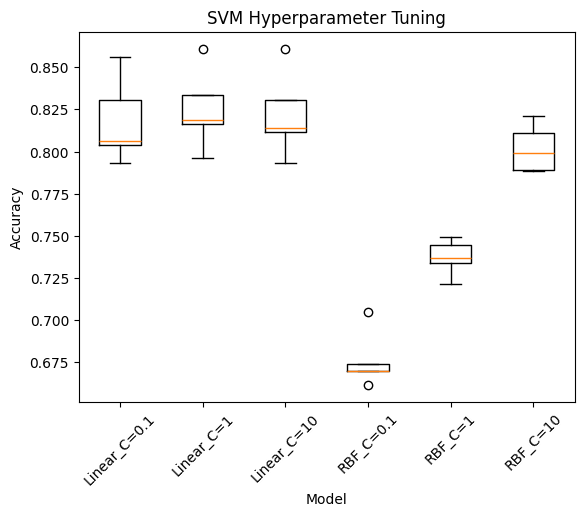

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the models with different C values for linear and rbf kernels
modelsSVM = [
    ('Linear_C=0.1', SVC(kernel='linear', C=0.1)),
    ('Linear_C=1', SVC(kernel='linear', C=1)),
    ('Linear_C=10', SVC(kernel='linear', C=10)),
    ('RBF_C=0.1', SVC(kernel='rbf', C=0.1)),
    ('RBF_C=1', SVC(kernel='rbf', C=1)),
    ('RBF_C=10', SVC(kernel='rbf', C=10))
]

# Initialize cross-validation
kfold = StratifiedKFold(n_splits=5)
resultSVM = []
nameSVM = []

# Evaluate each model
for name, model in modelsSVM:
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
    resultSVM.append(cv_results)
    nameSVM.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')

# Visualize the results
import matplotlib.pyplot as plt

plt.boxplot(resultSVM, labels=nameSVM)
plt.title('SVM Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


Linear_C=0.1: Mean Accuracy = 0.8261, Std = 0.0223
Linear_C=1: Mean Accuracy = 0.8256, Std = 0.0203
Linear_C=10: Mean Accuracy = 0.8266, Std = 0.0230
RBF_C=0.1: Mean Accuracy = 0.8395, Std = 0.0186
RBF_C=1: Mean Accuracy = 0.8678, Std = 0.0098
RBF_C=10: Mean Accuracy = 0.8763, Std = 0.0072


<ipython-input-36-f42237a8146d>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultSVM, labels=nameSVM)


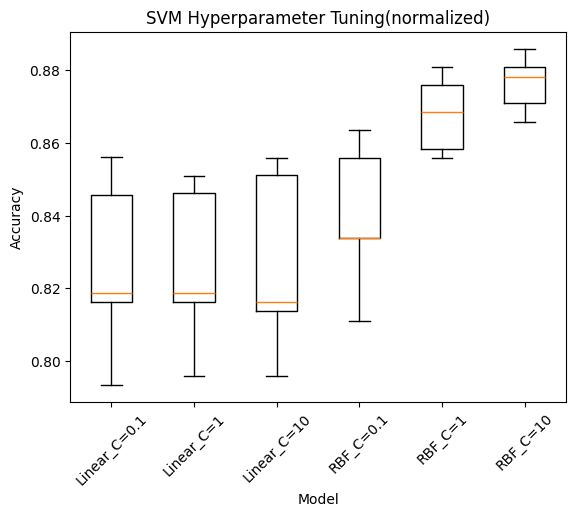

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the models with different C values for linear and rbf kernels
modelsSVM = [
    ('Linear_C=0.1', SVC(kernel='linear', C=0.1)),
    ('Linear_C=1', SVC(kernel='linear', C=1)),
    ('Linear_C=10', SVC(kernel='linear', C=10)),
    ('RBF_C=0.1', SVC(kernel='rbf', C=0.1)),
    ('RBF_C=1', SVC(kernel='rbf', C=1)),
    ('RBF_C=10', SVC(kernel='rbf', C=10))
]

# Initialize cross-validation
kfold = StratifiedKFold(n_splits=5)
resultSVM = []
nameSVM = []

# Evaluate each model
for name, model in modelsSVM:
    cv_results = cross_val_score(model, xtrains, ytrain, cv=kfold, scoring='accuracy')
    resultSVM.append(cv_results)
    nameSVM.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')

# Visualize the results
import matplotlib.pyplot as plt

plt.boxplot(resultSVM, labels=nameSVM)
plt.title('SVM Hyperparameter Tuning(normalized)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


Validation Accuracy: 0.8155
Confusion Matrix:
[[239  46]
 [ 47 172]]


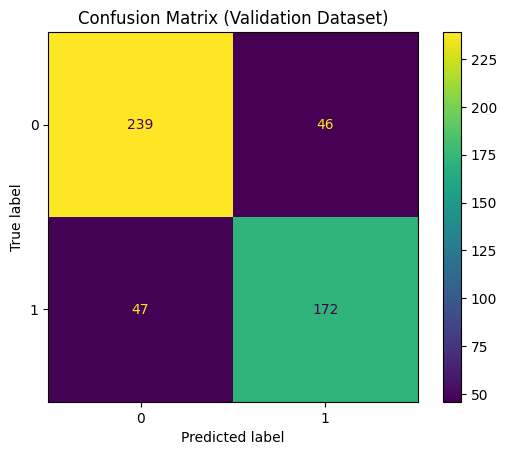


Cross-Validation Results:
Mean Accuracy: 0.8251
Standard Deviation: 0.0215


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Train the best model
best_svm = SVC(kernel='linear', C=1)

# Train on the training dataset
best_svm.fit(xtrain, ytrain)

# Step 2: Make predictions on the validation dataset
yval_pred = best_svm.predict(xval)

# Step 3: Evaluate performance
val_accuracy = accuracy_score(yval, yval_pred)
conf_matrix = confusion_matrix(yval, yval_pred)

# Print results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 4: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svm.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Validation Dataset)")
plt.show()

# Step 5: Perform cross-validation to calculate mean accuracy and standard deviation
cv_results = cross_val_score(best_svm, xtrain, ytrain, cv=5, scoring='accuracy')

# Print cross-validation results
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {cv_results.mean():.4f}")
print(f"Standard Deviation: {cv_results.std():.4f}")


SVM with Original Features:
Validation Accuracy (Original Features): 0.8155
Confusion Matrix (Original Features):
[[239  46]
 [ 47 172]]


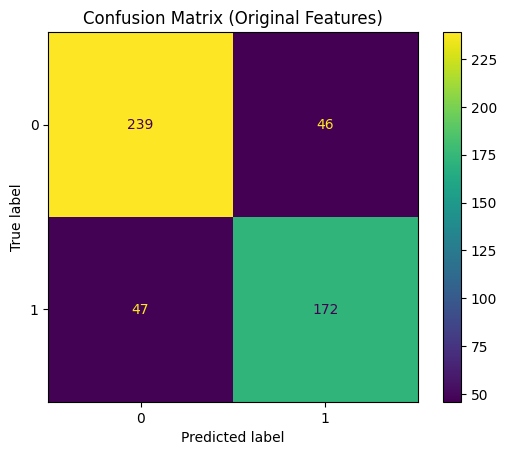


Cross-Validation Results (Original Features):
Mean Accuracy: 0.8251
Standard Deviation: 0.0215

SVM with Normalized Features:
Validation Accuracy (Normalized Features): 0.8115
Confusion Matrix (Normalized Features):
[[240  45]
 [ 50 169]]


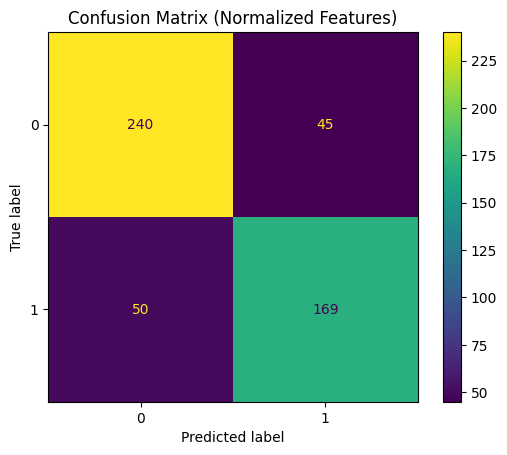


Cross-Validation Results (Normalized Features):
Mean Accuracy: 0.8256
Standard Deviation: 0.0203


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Train and evaluate on original features
print("SVM with Original Features:")

# Initialize SVM
svm_original = SVC(kernel='linear', C=1)

# Train on original features
svm_original.fit(xtrain, ytrain)

# Predict on validation dataset
yval_pred_original = svm_original.predict(xval)

# Evaluate performance
val_accuracy_original = accuracy_score(yval, yval_pred_original)
conf_matrix_original = confusion_matrix(yval, yval_pred_original)

# Print results
print(f"Validation Accuracy (Original Features): {val_accuracy_original:.4f}")
print("Confusion Matrix (Original Features):")
print(conf_matrix_original)

# Plot confusion matrix for original features
disp_original = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_original, display_labels=svm_original.classes_)
disp_original.plot(cmap='viridis')
plt.title("Confusion Matrix (Original Features)")
plt.show()

# Perform cross-validation on original features
cv_results_original = cross_val_score(svm_original, xtrain, ytrain, cv=5, scoring='accuracy')
print("\nCross-Validation Results (Original Features):")
print(f"Mean Accuracy: {cv_results_original.mean():.4f}")
print(f"Standard Deviation: {cv_results_original.std():.4f}")


# Step 2: Train and evaluate on normalized features
print("\nSVM with Normalized Features:")

# Initialize SVM
svm_normalized = SVC(kernel='linear', C=1)

# Train on normalized features
svm_normalized.fit(xtrains, ytrain)

# Predict on validation dataset
yval_pred_normalized = svm_normalized.predict(xvals)

# Evaluate performance
val_accuracy_normalized = accuracy_score(yval, yval_pred_normalized)
conf_matrix_normalized = confusion_matrix(yval, yval_pred_normalized)

# Print results
print(f"Validation Accuracy (Normalized Features): {val_accuracy_normalized:.4f}")
print("Confusion Matrix (Normalized Features):")
print(conf_matrix_normalized)

# Plot confusion matrix for normalized features
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=svm_normalized.classes_)
disp_normalized.plot(cmap='viridis')
plt.title("Confusion Matrix (Normalized Features)")
plt.show()

# Perform cross-validation on normalized features
cv_results_normalized = cross_val_score(svm_normalized, xtrains, ytrain, cv=5, scoring='accuracy')
print("\nCross-Validation Results (Normalized Features):")
print(f"Mean Accuracy: {cv_results_normalized.mean():.4f}")
print(f"Standard Deviation: {cv_results_normalized.std():.4f}")
